# Importing Libraries

In [ ]:
import pandas as pd
import ast
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import ipywidgets as widgets
import numpy as np
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **2014**

# Loading data set of 2014

In [ ]:
dataset1 = open ("/content/drive/MyDrive/Data/uber-raw-data-apr14.csv")

In [ ]:
april14_df1 = pd.read_csv("/content/drive/MyDrive/Data/uber-raw-data-apr14.csv")

In [ ]:
dataset2 = open("/content/drive/MyDrive/Data/uber-raw-data-may14.csv")

In [ ]:
may14_df2 = pd.read_csv("/content/drive/MyDrive/Data/uber-raw-data-may14.csv")

In [ ]:
dataset3 = open("/content/drive/MyDrive/Data/uber-raw-data-jun14.csv")

In [ ]:
jun14_df3 = pd.read_csv("/content/drive/MyDrive/Data/uber-raw-data-jun14.csv")

In [ ]:
dataset4 = open("/content/drive/MyDrive/Data/uber-raw-data-jul14.csv")

In [ ]:
jul14_df4 = pd.read_csv("/content/drive/MyDrive/Data/uber-raw-data-jul14.csv")

In [ ]:
dataset5 = open("/content/drive/MyDrive/Data/uber-raw-data-aug14.csv")

In [ ]:
aug14_df5 = pd.read_csv("/content/drive/MyDrive/Data/uber-raw-data-aug14.csv")

In [ ]:
dataset6 = open("/content/drive/MyDrive/Data/uber-raw-data-sep14.csv")

In [ ]:
sep14_df6 = pd.read_csv("/content/drive/MyDrive/Data/uber-raw-data-sep14.csv")

In [ ]:
april14_df1.shape, may14_df2.shape, jun14_df3.shape, jul14_df4.shape, aug14_df5.shape, sep14_df6.shape

((564516, 4), (652435, 4), (663844, 4), (796121, 4), (829275, 4), (1028136, 4))

# Combining all data sets together of 2014

In [ ]:
uber2014_df = pd.DataFrame()
uber2014_df = uber2014_df.append(april14_df1)
uber2014_df = uber2014_df.append(may14_df2)
uber2014_df = uber2014_df.append(jun14_df3)
uber2014_df = uber2014_df.append(jul14_df4)
uber2014_df = uber2014_df.append(aug14_df5)
uber2014_df = uber2014_df.append(sep14_df6)
uber2014_df.shape

(4534327, 4)

In [ ]:
uber2014_df.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [ ]:
uber2014_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4534327 entries, 0 to 1028135
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Date/Time  object 
 1   Lat        float64
 2   Lon        float64
 3   Base       object 
dtypes: float64(2), object(2)
memory usage: 173.0+ MB


# Visualizations of maximum number of uber pickups in 2014

Converting 'Date/Time' column in uber2014_df into datetime

In [ ]:
uber2014_df['Date/Time'] = pd.to_datetime(uber2014_df['Date/Time'], errors='coerce')
uber2014_df['Date/Time']

0         2014-04-01 00:11:00
1         2014-04-01 00:17:00
2         2014-04-01 00:21:00
3         2014-04-01 00:28:00
4         2014-04-01 00:33:00
                  ...        
1028131   2014-09-30 22:57:00
1028132   2014-09-30 22:57:00
1028133   2014-09-30 22:58:00
1028134   2014-09-30 22:58:00
1028135   2014-09-30 22:58:00
Name: Date/Time, Length: 4534327, dtype: datetime64[ns]

Extracting out month, time and year from 'Date/Time' column

In [ ]:
uber2014_df['month'] = uber2014_df['Date/Time'].dt.month
uber2014_df['month']

0          4
1          4
2          4
3          4
4          4
          ..
1028131    9
1028132    9
1028133    9
1028134    9
1028135    9
Name: month, Length: 4534327, dtype: int64

In [ ]:
uber2014_df['time'] = uber2014_df['Date/Time'].dt.time
uber2014_df['time']

0          00:11:00
1          00:17:00
2          00:21:00
3          00:28:00
4          00:33:00
             ...   
1028131    22:57:00
1028132    22:57:00
1028133    22:58:00
1028134    22:58:00
1028135    22:58:00
Name: time, Length: 4534327, dtype: object

In [ ]:
uber2014_df['year'] = uber2014_df['Date/Time'].dt.year
uber2014_df['year']

0          2014
1          2014
2          2014
3          2014
4          2014
           ... 
1028131    2014
1028132    2014
1028133    2014
1028134    2014
1028135    2014
Name: year, Length: 4534327, dtype: int64

In [ ]:
uber2014_df['day'] = uber2014_df['Date/Time'].dt.day
uber2014_df['day']

0           1
1           1
2           1
3           1
4           1
           ..
1028131    30
1028132    30
1028133    30
1028134    30
1028135    30
Name: day, Length: 4534327, dtype: int64

In [ ]:
uber2014_df['month'].value_counts()

9    1028136
8     829275
7     796121
6     663844
5     652435
4     564516
Name: month, dtype: int64

Bar Plot to show most uber pickups in different months of 2014

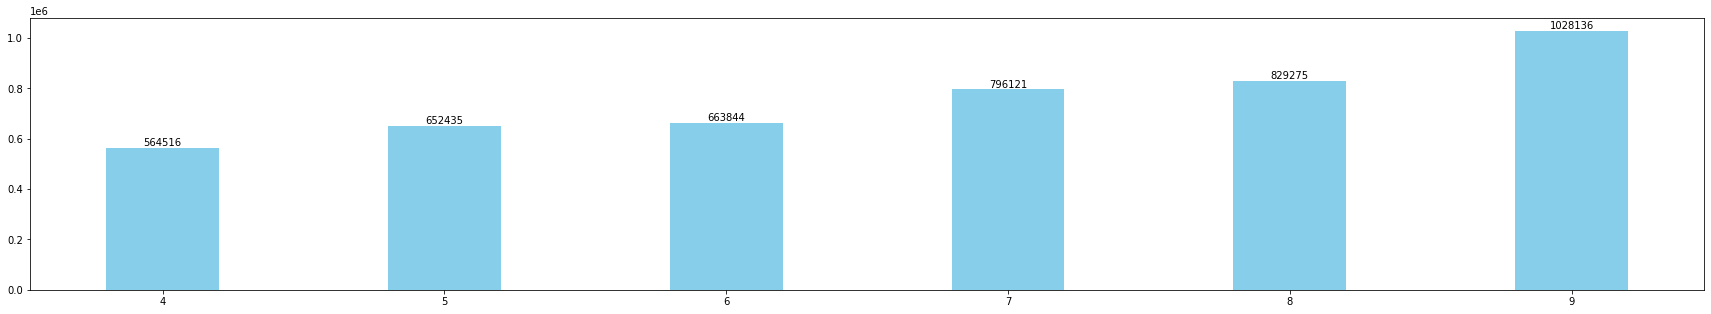

In [ ]:
z = uber2014_df['month'].value_counts().sort_values()
x = z.keys()
y = []
for i in range(len(z)):
  y.append(z.iloc[i])

fig = plt.figure(figsize = (30, 5))

# creating the bar plot
plt.bar(x, y, color ='skyblue',
        width = 0.4)
for i in range(len(x)):
  plt.text(x[i], y[i], y[i], ha="center", va="bottom")



*   Uber Pickups were most in the month of september(9) during 2014



Line plot to show most uber pickups in 2014

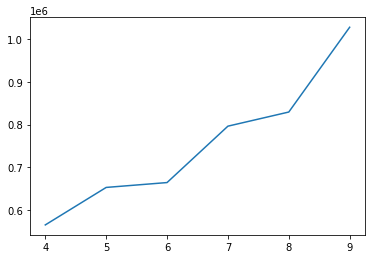

In [ ]:
uber2014_df['month'].value_counts().sort_values().plot.line()

Line chart to show maximum number of uber pickups at different time

In [ ]:
uber2014_df['time'].value_counts().sort_values()

02:39:00     673
02:36:00     678
02:38:00     690
02:46:00     697
02:40:00     703
            ... 
17:10:00    5826
17:13:00    5868
18:12:00    5879
17:12:00    5880
17:14:00    5882
Name: time, Length: 1440, dtype: int64

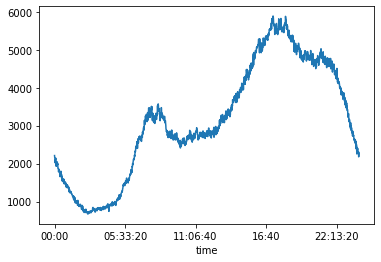

In [ ]:
uber2014_df['time'].value_counts().sort_values().plot.line()

The x-axis shows time and y-axis shows the counts at different time.
The time gap on x-axis is at a gap of 5 hours and 33 minutes.
From the line chart, it can be observed that during 9:00 a.m. and 10:00 a.m. uber pickups were high. But during evening after 5:00 p.m. there is a sudden increase in the uber pickups which is also much larger than the morning time.

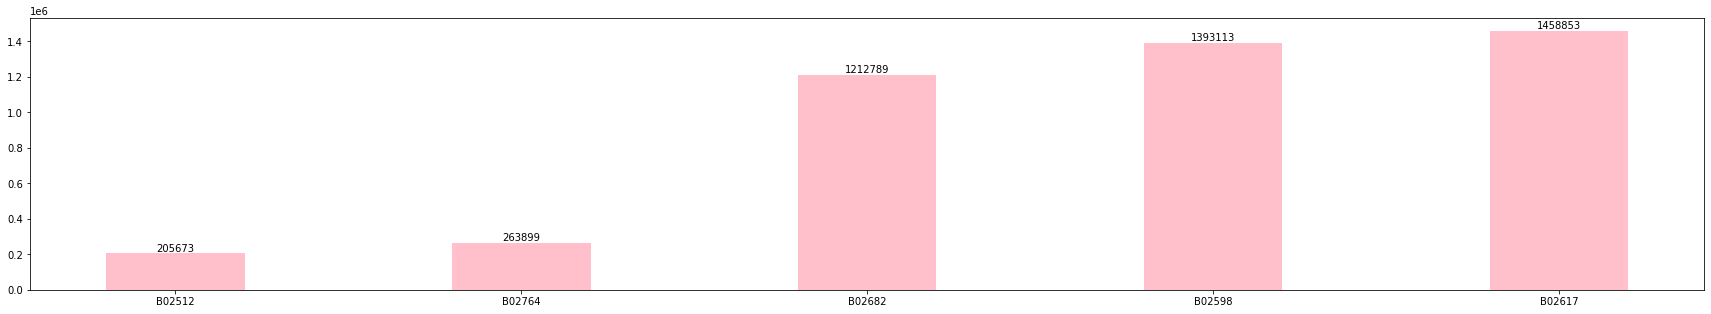

In [ ]:
z = uber2014_df['Base'].value_counts().sort_values()
x = z.keys()
y = []
for i in range(len(z)):
  y.append(z.iloc[i])

fig = plt.figure(figsize = (30, 5))

# creating the bar plot
plt.bar(x, y, color ='pink',
        width = 0.4)
for i in range(len(x)):
  plt.text(x[i], y[i], y[i], ha="center", va="bottom")

The above bar graph shows the uber pickups from different Uber Bases. B02617 base i.e. Weiter Base has the largest pickups in 2014.

In [ ]:
import plotly.express as px

In [ ]:
weekday=pd.DataFrame(uber2014_df[['day','month']].value_counts()).reset_index()
weekday.columns=['Day','Month','Count']
weekday['Day']=pd.Categorical(weekday['Day'],categories=[1 ,2 ,3 ,4 ,5 ,6 ,7 ,8 ,9 ,10 ,11 ,12 ,13 ,14 ,15 ,16 ,17 ,18 ,19 ,20 ,21 ,22 ,23 ,24 ,25 ,26 ,27 ,28 ,29 ,30 ,31],ordered=True)
weekday['Month']=pd.Categorical(weekday['Month'],categories=[4,5,6,7,8,9],ordered=True)

In [ ]:
fig1=px.bar(weekday,
      x='Day',
      y='Count',
      color='Month',
      template='plotly_dark',
      labels={'Count':'Number of Trips','Day':'Day of the Month'},
      width=1100,
      height=500,
      category_orders={"Month": [4,5,6,7,8,9]},
      color_discrete_sequence=['#2C2C3E','#2E5467','#1E7F84','#33AC8D','#78D584','#D1FA74'],
    text='Count')
fig1.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig1.update_layout(title_text='Uber trip by Months and Days', title_x=0.5)
fig1.show()

# Visualization of pickup location in 2014

Installing folium library for maps

In [ ]:
!pip install folium

In [ ]:
import folium

In [ ]:
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

In [ ]:
uber2014_df.head()

,Date/Time,Lat,Lon,Base,month,time,year
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,4,00:11:00,2014
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,4,00:17:00,2014
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,4,00:21:00,2014
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,4,00:28:00,2014
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,4,00:33:00,2014


In [ ]:
m_1 = folium.Map(location=[40.7128,-74.0060], tiles='openstreetmap', zoom_start=10)

# Display the map
m_1

**Displaying map of New York City**

In [ ]:
uber2014_df.head(10)

,Date/Time,Lat,Lon,Base,month,time,year
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,4,00:11:00,2014
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,4,00:17:00,2014
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,4,00:21:00,2014
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,4,00:28:00,2014
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,4,00:33:00,2014
5,2014-04-01 00:33:00,40.7383,-74.0403,B02512,4,00:33:00,2014
6,2014-04-01 00:39:00,40.7223,-73.9887,B02512,4,00:39:00,2014
7,2014-04-01 00:45:00,40.7620,-73.9790,B02512,4,00:45:00,2014
8,2014-04-01 00:55:00,40.7524,-73.9960,B02512,4,00:55:00,2014
9,2014-04-01 01:01:00,40.7575,-73.9846,B02512,4,01:01:00,2014


In [ ]:
m = folium.Map(
    location=[40.7690 ,  -73.9549],
    zoom_start=12,
    tiles='Stamen Terrain'
)

folium.Marker([40.7267 , -74.0345]).add_to(m)
folium.Marker([40.7316 ,  -73.98733]).add_to(m)
folium.Marker([40.7588 ,	-73.9776]).add_to(m)
folium.Marker([40.7594	,-73.9722]).add_to(m)
folium.Marker([40.7690	, -73.9549]).add_to(m)
folium.Marker([40.7316 ,	-73.9873]).add_to(m)
folium.Marker([40.6932	, -73.9693]).add_to(m)
folium.Marker([40.7273	, -74.0057]).add_to(m)
folium.Marker([40.7594	, -73.9820]).add_to(m)
folium.Marker([40.7520	, -74.0027]).add_to(m)
folium.Marker([40.7383	, -74.0403]).add_to(m)
folium.Marker([40.7223	, -73.9887]).add_to(m)
folium.Marker([40.7620	, -73.9790]).add_to(m)
folium.Marker([40.7524	, -73.9960]).add_to(m)
folium.Marker([40.7575	, -73.9846]).add_to(m)
folium.Marker([40.7371	, -74.0289]).add_to(m)
folium.Marker([40.6446	, -73.7823]).add_to(m)
folium.Marker([40.7163	, -73.9623]).add_to(m)
folium.Marker([40.6979	, -73.9365]).add_to(m)
folium.Marker([40.7668	, -73.9845]).add_to(m)
folium.Marker([40.6911	, -74.1773]).add_to(m)
folium.Marker([40.8519	, -73.9319]).add_to(m)
folium.Marker([40.7081	, -74.0066	]).add_to(m)
folium.Marker([40.7140	, -73.9496]).add_to(m)

m

**Map of some of the pickup location of uber in New York City**

# Uber Calendar Heatmap for 2014

Importing calplot library for calendar heatmap

In [ ]:
!pip install calplot

In [ ]:
import calplot

Converting 'Date/Time' column in uber2014_df to datetime

In [ ]:
uber2014_df['Date/Time'] = pd.to_datetime(uber2014_df['Date/Time'], errors='coerce')
uber2014_df['Date/Time']

0         2014-04-01 00:11:00
1         2014-04-01 00:17:00
2         2014-04-01 00:21:00
3         2014-04-01 00:28:00
4         2014-04-01 00:33:00
                  ...        
1028131   2014-09-30 22:57:00
1028132   2014-09-30 22:57:00
1028133   2014-09-30 22:58:00
1028134   2014-09-30 22:58:00
1028135   2014-09-30 22:58:00
Name: Date/Time, Length: 4534327, dtype: datetime64[ns]

Extracting date from uber2014_df['Date/Time']

In [ ]:
uber2014_df['date'] = uber2014_df['Date/Time'].dt.date
uber2014_df['date']

0          2014-04-01
1          2014-04-01
2          2014-04-01
3          2014-04-01
4          2014-04-01
              ...    
1028131    2014-09-30
1028132    2014-09-30
1028133    2014-09-30
1028134    2014-09-30
1028135    2014-09-30
Name: date, Length: 4534327, dtype: object

In [ ]:
uber2014_df['date'] = pd.to_datetime(uber2014_df['date'])

# set index to date
uber2014_df = uber2014_df.set_index('date')
uber2014_df.head()

,Date/Time,Lat,Lon,Base,month,time,year
date,,,,,,,
2014-04-01,2014-04-01 00:11:00,40.7690,-73.9549,B02512,4,00:11:00,2014
2014-04-01,2014-04-01 00:17:00,40.7267,-74.0345,B02512,4,00:17:00,2014
2014-04-01,2014-04-01 00:21:00,40.7316,-73.9873,B02512,4,00:21:00,2014
2014-04-01,2014-04-01 00:28:00,40.7588,-73.9776,B02512,4,00:28:00,2014
2014-04-01,2014-04-01 00:33:00,40.7594,-73.9722,B02512,4,00:33:00,2014


In [ ]:
# test if DatetimeIndex
isinstance(uber2014_df.index, pd.DatetimeIndex)

True

In [ ]:
#Constructing a new dataframe with respect to panda series and index by DateTimeIndex
latitude = pd.Series(uber2014_df.Lat)
latitude.head()

date
2014-04-01    40.7690
2014-04-01    40.7267
2014-04-01    40.7316
2014-04-01    40.7588
2014-04-01    40.7594
Name: Lat, dtype: float64

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


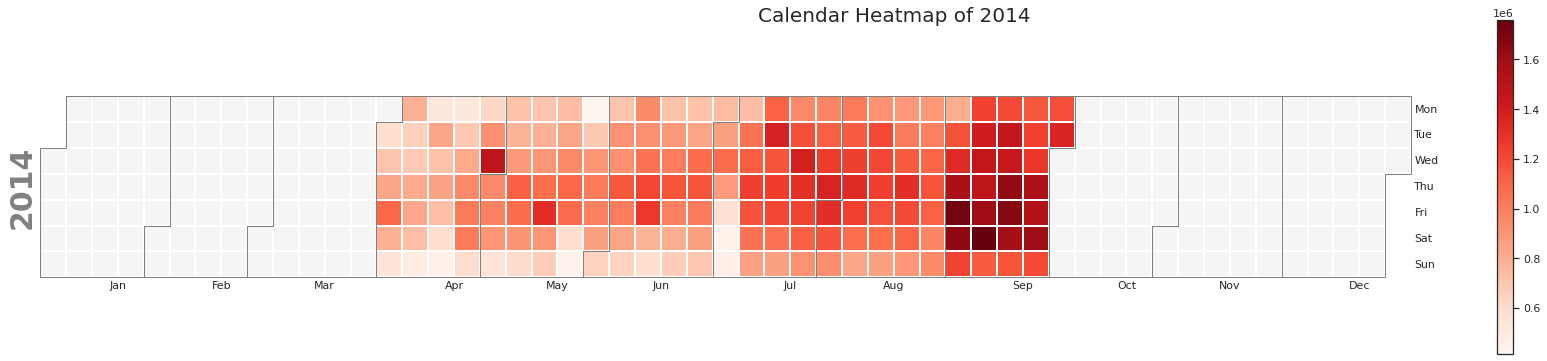

In [ ]:
calplot.calplot(data=latitude, cmap='Reds', figsize=(25,5));
plt.suptitle('Calendar Heatmap of 2014', y=1.0, fontsize=20);

The above calendar heatmap of 2014 shows the number of days in maximum number of pickups were done.

# **Uber 2015**

# Loading data set of 2015

In [ ]:
dataset7 = open("/content/drive/MyDrive/Data/uber-raw-data-janjune-15.csv")

In [ ]:
uber2015_df = pd.read_csv("/content/drive/MyDrive/Data/uber-raw-data-janjune-15.csv")

In [ ]:
uber2015_df.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-17 09:47:00,B02617,141
1,B02617,2015-05-17 09:47:00,B02617,65
2,B02617,2015-05-17 09:47:00,B02617,100
3,B02617,2015-05-17 09:47:00,B02774,80
4,B02617,2015-05-17 09:47:00,B02617,90


# Visualizations of maximum number of uber pickups in 2015

Converting 'Date/Time' column in uber2015_df into datetime

In [ ]:
uber2015_df['Pickup_date'] = pd.to_datetime(uber2015_df['Pickup_date'], errors='coerce')
uber2015_df['Pickup_date']

0          2015-05-17 09:47:00
1          2015-05-17 09:47:00
2          2015-05-17 09:47:00
3          2015-05-17 09:47:00
4          2015-05-17 09:47:00
                   ...        
14270474   2015-05-08 15:43:00
14270475   2015-05-08 15:43:00
14270476   2015-05-08 15:43:00
14270477   2015-05-08 15:44:00
14270478   2015-05-08 15:44:00
Name: Pickup_date, Length: 14270479, dtype: datetime64[ns]

Extracting out month, time and year from 'Pickup_date' column

In [ ]:
uber2015_df['month'] = uber2015_df['Pickup_date'].dt.month
uber2015_df['month']

0           5
1           5
2           5
3           5
4           5
           ..
14270474    5
14270475    5
14270476    5
14270477    5
14270478    5
Name: month, Length: 14270479, dtype: int64

In [ ]:
uber2015_df['time1'] = uber2015_df['Pickup_date'].dt.time
uber2015_df['time1']

0           09:47:00
1           09:47:00
2           09:47:00
3           09:47:00
4           09:47:00
              ...   
14270474    15:43:00
14270475    15:43:00
14270476    15:43:00
14270477    15:44:00
14270478    15:44:00
Name: time1, Length: 14270479, dtype: object

In [ ]:
uber2015_df['year'] = uber2015_df['Pickup_date'].dt.year
uber2015_df['year']

0           2015
1           2015
2           2015
3           2015
4           2015
            ... 
14270474    2015
14270475    2015
14270476    2015
14270477    2015
14270478    2015
Name: year, Length: 14270479, dtype: int64

In [ ]:
uber2015_df['month'].value_counts().sort_values()

1    1953801
3    2259773
2    2263620
4    2280837
5    2695553
6    2816895
Name: month, dtype: int64

Bar Plot to show most uber pickups in different months of 2015

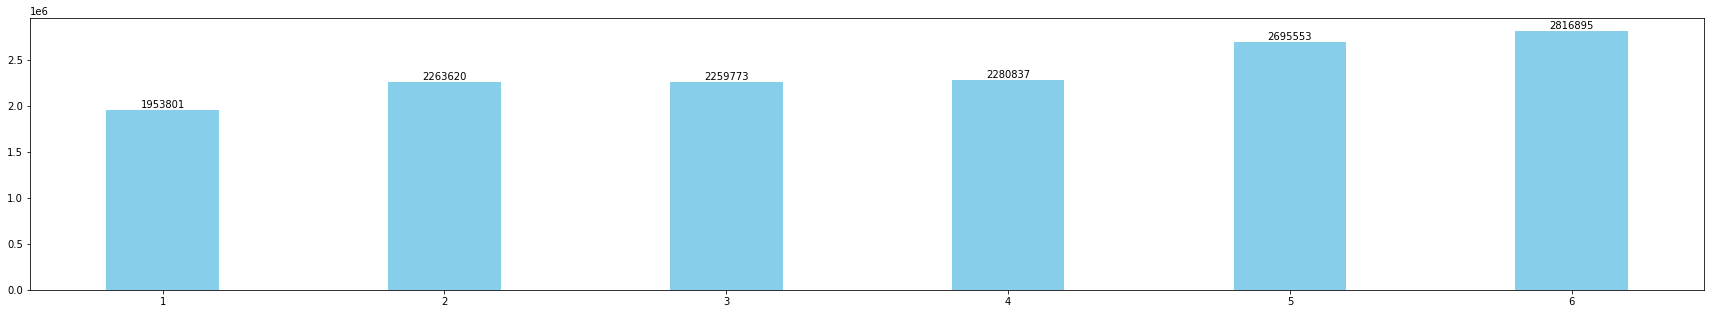

In [ ]:
z = uber2015_df['month'].value_counts().sort_values()
x = z.keys()
y = []
for i in range(len(z)):
  y.append(z.iloc[i])

fig = plt.figure(figsize = (30, 5))

# creating the bar plot
plt.bar(x, y, color ='skyblue',
        width = 0.4)
for i in range(len(x)):
  plt.text(x[i], y[i], y[i], ha="center", va="bottom")

Uber Pickups were most in the month of June(6) during 2015

In [ ]:
uber2015_df['time1'].value_counts().sort_values()

04:13:54        2
04:44:17        2
05:18:17        3
04:04:41        3
04:13:58        3
            ...  
19:19:00    11946
19:17:00    11975
19:24:00    11998
19:20:00    11999
19:18:00    12220
Name: time1, Length: 86400, dtype: int64

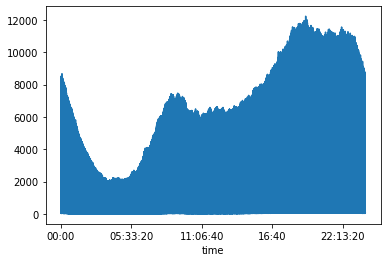

In [ ]:
uber2015_df['time1'].value_counts().sort_values().plot.line()

The x-axis shows time and y-axis shows the counts at different time. The time gap on x-axis is at a gap of 5 hours and 33 minutes. From the line chart, it can be observed that during 9:00 a.m. and 10:00 a.m. uber pickups were high. But during evening after 5:00 p.m. there is a sudden increase in the uber pickups around 7:00 p.m. which is also much larger than the morning time.

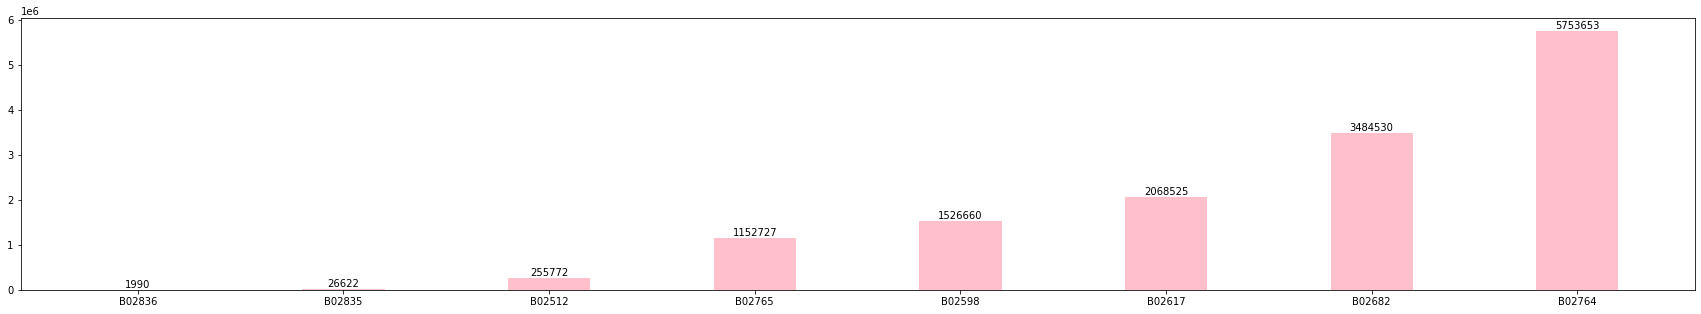

In [ ]:
z = uber2015_df['Dispatching_base_num'].value_counts().sort_values()
x = z.keys()
y = []
for i in range(len(z)):
  y.append(z.iloc[i])

fig = plt.figure(figsize = (30, 5))

# creating the bar plot
plt.bar(x, y, color ='pink',
        width = 0.4)
for i in range(len(x)):
  plt.text(x[i], y[i], y[i], ha="center", va="bottom")

The above bar graph shows the uber pickups from different Uber Bases. B02764 base i.e. Danach-NY Base has the largest pickups in 2015.

# Uber Calendar Heatmap for 2015

Converting 'Pickup_date' column in uber2015_df to datetime

In [ ]:
uber2015_df['Pickup_date'] = pd.to_datetime(uber2015_df['Pickup_date'], errors='coerce')
uber2015_df['Pickup_date']

0          2015-05-17 09:47:00
1          2015-05-17 09:47:00
2          2015-05-17 09:47:00
3          2015-05-17 09:47:00
4          2015-05-17 09:47:00
                   ...        
14270474   2015-05-08 15:43:00
14270475   2015-05-08 15:43:00
14270476   2015-05-08 15:43:00
14270477   2015-05-08 15:44:00
14270478   2015-05-08 15:44:00
Name: Pickup_date, Length: 14270479, dtype: datetime64[ns]

Extracting date from uber2015_df['Pickup_date']

In [ ]:
uber2015_df['date'] = uber2015_df['Pickup_date'].dt.date
uber2015_df['date']

0           2015-05-17
1           2015-05-17
2           2015-05-17
3           2015-05-17
4           2015-05-17
               ...    
14270474    2015-05-08
14270475    2015-05-08
14270476    2015-05-08
14270477    2015-05-08
14270478    2015-05-08
Name: date, Length: 14270479, dtype: object

In [ ]:
uber2015_df['date'] = pd.to_datetime(uber2015_df['date'])

# set index to date
uber2015_df = uber2015_df.set_index('date')
uber2015_df.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,month,time1,year
date,,,,,,,
2015-05-17,B02617,2015-05-17 09:47:00,B02617,141,5,09:47:00,2015
2015-05-17,B02617,2015-05-17 09:47:00,B02617,65,5,09:47:00,2015
2015-05-17,B02617,2015-05-17 09:47:00,B02617,100,5,09:47:00,2015
2015-05-17,B02617,2015-05-17 09:47:00,B02774,80,5,09:47:00,2015
2015-05-17,B02617,2015-05-17 09:47:00,B02617,90,5,09:47:00,2015


In [ ]:
# test if DatetimeIndex
isinstance(uber2015_df.index, pd.DatetimeIndex)

True

In [ ]:
#Constructing a new dataframe with respect to panda series and index by DateTimeIndex
location = pd.Series(uber2015_df.locationID)
location.head()

date
2015-05-17    141
2015-05-17     65
2015-05-17    100
2015-05-17     80
2015-05-17     90
Name: locationID, dtype: int64

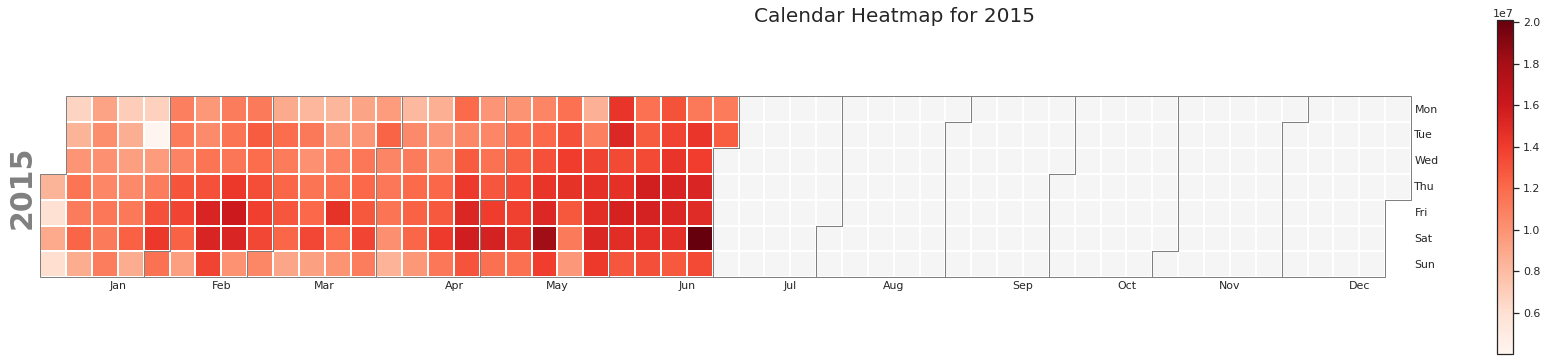

In [ ]:
calplot.calplot(data=location, cmap='Reds', figsize=(25,5));
plt.suptitle('Calendar Heatmap for 2015', y=1.0, fontsize=20);

The above calendar heatmap of 2015 shows the number of days in maximum number of pickups were done.

# Uber 2014 & 2015 pickups together

In [ ]:
uber1415_df = pd.DataFrame()
uber1415_df = uber1415_df.append(uber2014_df)
uber1415_df = uber1415_df.append(uber2015_df)
uber1415_df.shape

(18804806, 12)

In [ ]:
uber1415_df.head()

,Date/Time,Lat,Lon,Base,month,time,year,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,time1
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,4,00:11:00,2014,NaN,NaT,NaN,NaN,NaN
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,4,00:17:00,2014,NaN,NaT,NaN,NaN,NaN
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,4,00:21:00,2014,NaN,NaT,NaN,NaN,NaN
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,4,00:28:00,2014,NaN,NaT,NaN,NaN,NaN
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,4,00:33:00,2014,NaN,NaT,NaN,NaN,NaN


# Visualization of comparing uber pickups in 2014 and 2015

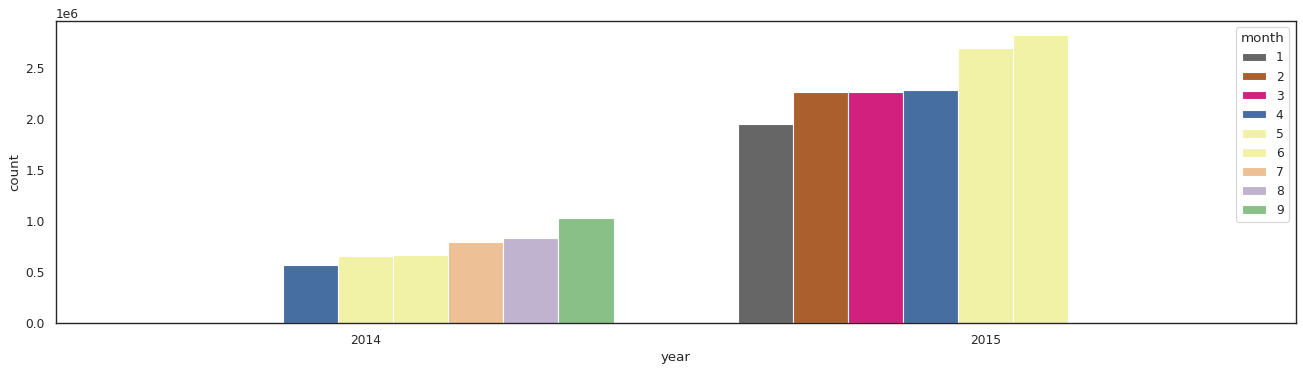

In [ ]:
fig = plt.figure(figsize=(20,5), dpi=80, facecolor='w', edgecolor='k')
sns.set(style="white")
sns.countplot(x='year', hue = 'month',data = uber1415_df, palette="Accent_r")

In 2015, the uber pickups were more as compared to 2014. From the data available, the following months are in common between 2014 and 2015: April, May, June, July. From these common months, 2015 have more pickups than 2014.